# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 88.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 82.8 MB/s eta 0:00:0000:0100:01


In [2]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('megaline_calls.csv', sep = ',')
internet = pd.read_csv('megaline_internet.csv', sep = ',')
messages = pd.read_csv('megaline_messages.csv', sep = ',')
plans = pd.read_csv('megaline_plans.csv', sep = ',')
users = pd.read_csv('megaline_users.csv', sep = ',')

## Preparar los datos

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Observando la muestra de datos, vemos que la tarifa "Surf" tiene un límite de 50 mensajes incluidos, 15,360 MB de datos y 500 minutos, con una tarifa mensual de $20. Además, los precios adicionales por mensaje, datos y minutos son 10 dolares/gb, 0.03 centavos por mensaje y por minuto.

Por otro lado, la tarifa "Ultimate" ofrece 1000 mensajes incluidos, 30,720 MB de datos y 3000 minutos, con una tarifa mensual de $70. Los precios adicionales por mensaje, datos y minutos son significativamente más bajos, siendo 7 dolares/gb, 0.01 centavos por mensaje y por minuto.

En cuanto a problemas potenciales, parece que no hay datos faltantes en este DataFrame, y los tipos de datos parecen ser adecuados para cada columna.

## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

NameError: name 'users' is not defined

In [7]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
churn_date_values = users['churn_date'].value_counts()
churn_date_values

NameError: name 'users' is not defined

La columna **churn_date** tiene 34 valores no nulos, lo que indica que algunos usuarios han dejado de usar el servicio. Además, el tipo de datos de la columna **reg_date** es object en lugar de datetime, lo que podría dificultar el análisis temporal si no se corrige.

En la muestra de datos, vemos información sobre el **user_id**, **first_name**, **last_name**, **age**, **city**, **reg_date**, plan y **churn_date** (si está presente). Parece que no hay datos faltantes en ninguna de las columnas, lo cual es bueno.

### Corregir los datos

Para corregir los datos, necesitamos convertir la columna **reg_date** al tipo de datos datetime para facilitar el análisis temporal. También podemos ajustar el formato de la columna **churn_date**, si es necesario, para que sea consistente con el formato de fecha.

Aquí está el código para corregir estos problemas:

In [1]:
# Convertir la columna reg_date al tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Si se necesita, convertir la columna churn_date al tipo datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

NameError: name 'pd' is not defined

### Enriquecer los datos

Para enriquecer los datos, podríamos agregar información demográfica adicional, como la distribución de edades de los usuarios, la distribución de usuarios por ciudad, etc. Esto podría proporcionar una comprensión más profunda de la base de usuarios de Megaline y ayudar en el análisis posterior.

In [9]:
# Calcular la distribución de edades de los usuarios
age_distribution = users['age'].value_counts().sort_index()

# Calcular la distribución de usuarios por ciudad
city_distribution = users['city'].value_counts()

In [10]:
age_distribution

age
18    15
19     8
20    13
21     8
22     7
23     9
24     6
25     7
26    10
27    14
28    13
29    10
30    12
31     6
32     4
33    12
34    10
35     6
36    10
37     6
38     7
39    11
40     6
41     7
42    10
43     3
44     8
45    10
46    10
47    11
48     7
49    10
50     6
51    11
52    11
53    10
54     6
55     6
56     9
57     7
58     5
59     8
60     9
61    14
62     4
63     6
64    10
65    11
66     9
67    11
68     2
69    14
70    14
71     6
72     4
73     5
74     6
75    10
Name: count, dtype: int64

In [11]:
city_distribution

city
New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Cape Coral-Fort Myers, FL MSA                       1
Name: count, Length: 73, dtype: int64

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En la información general del DataFrame de llamadas, observamos que hay 137,735 entradas, con 4 columnas en total. Las columnas son **id**, **user_id**, **call_date** y **duration**. No parece haber datos faltantes en ninguna de las columnas, lo cual es positivo. Sin embargo, la columna **call_date** está en formato de objeto en lugar de datetime, lo que podría dificultar el análisis temporal si no se corrige. Además, la duración de la llamada está en formato float64, lo cual puede no ser necesario si se redondea a los minutos como se indica en la descripción de las tarifas.

En la muestra de datos, vemos información sobre el **id** de la llamada, el **user_id**, **call_date** y **duration** de la llamada en minutos. Parece que los datos están completos y en el formato adecuado, pero la duración de la llamada puede necesitar ser redondeada a minutos para ser consistente con la descripción de las tarifas.

### Corregir los datos

Para corregir los datos, necesitamos convertir la columna call_date al tipo de datos datetime y redondear la duración de la llamada a los minutos más cercanos.

Aquí está el código para corregir estos problemas:

In [14]:
# Convertir la columna call_date al tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d)

# Redondear la duración de la llamada a los minutos más cercanos
calls['duration'] = np.ceil(calls['duration']).astype(int)

### Enriquecer los datos

Para enriquecer los datos, podríamos calcular el número total de llamadas realizadas por cada usuario y la duración total de las llamadas por usuario. Esto podría proporcionar información adicional sobre el uso del servicio de llamadas por parte de los usuarios.

In [15]:
# Calcular el número total de llamadas realizadas por cada usuario
total_calls = calls.groupby('user_id')['id'].count()

# Calcular la duración total de las llamadas por usuario
total_duration = calls.groupby('user_id')['duration'].sum()

In [16]:
total_calls

user_id
1000     16
1001    261
1002    113
1003    149
1004    370
       ... 
1495    253
1496    195
1497     54
1498    451
1499    204
Name: id, Length: 481, dtype: int64

In [17]:
total_duration

user_id
1000     124
1001    1728
1002     829
1003    1104
1004    2772
        ... 
1495    1765
1496    1455
1497     300
1498    3211
1499    1535
Name: duration, Length: 481, dtype: int32

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


En la información general del DataFrame de mensajes, observamos que hay 76,051 entradas, con 3 columnas en total. Las columnas son **id**, **user_id** y **message_date**. No parece haber datos faltantes en ninguna de las columnas, lo cual es positivo. Sin embargo, la columna **message_date** está en formato de objeto en lugar de datetime, lo que podría dificultar el análisis temporal si no se corrige.

En la muestra de datos, vemos información sobre el id del mensaje, el **user_id** y **message_date**. Parece que los datos están completos y en el formato adecuado, pero la columna **message_date** necesita ser convertida al tipo de datos datetime.

### Corregir los datos

Para corregir los datos, necesitamos convertir la columna **message_date** al tipo de datos datetime.

Aquí está el código para corregir este problema:

In [20]:
# Convertir la columna message_date al tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

Para enriquecer los datos, podríamos calcular el número total de mensajes enviados por cada usuario. Esto podría proporcionar información adicional sobre el uso del servicio de mensajes por parte de los usuarios.

In [21]:
# Calcular el número total de mensajes enviados por cada usuario
total_messages = messages.groupby('user_id')['id'].count()

total_messages

user_id
1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: id, Length: 402, dtype: int64

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


En la información general del DataFrame de internet, observamos que hay 104,825 entradas, con 4 columnas en total. Las columnas son **id**, **user_id**, **session_date** y **mb_used**. No parece haber datos faltantes en ninguna de las columnas, lo cual es positivo. Sin embargo, la columna **session_date** está en formato de objeto en lugar de datetime, lo que podría dificultar el análisis temporal si no se corrige.

En la muestra de datos, vemos información sobre el id de la sesión de internet, el **user_id**, **session_date** y **mb_used** (volumen de datos utilizado en megabytes). Parece que los datos están completos y en el formato adecuado, pero la columna **session_date** necesita ser convertida al tipo de datos datetime.

### Corregir los datos

Para corregir los datos, necesitamos convertir la columna session_date al tipo de datos datetime.

Aquí está el código para corregir este problema:

In [24]:
# Convertir la columna session_date al tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

Para enriquecer los datos, podríamos calcular el volumen total de datos utilizado por cada usuario. Esto podría proporcionar información adicional sobre el uso del servicio de internet por parte de los usuarios.

In [25]:
import numpy as np

# Calcular el volumen total de datos utilizado por cada usuario en megabytes
total_data_usage_mb = internet.groupby('user_id')['mb_used'].sum()

# Convertir de megabytes a gigabytes
total_data_usage_gb = total_data_usage_mb / 1024  # 1 GB = 1024 MB

# Redondear hacia arriba los valores de gigabytes
total_data_usage_gb_rounded = np.ceil(total_data_usage_gb)

# Mostrar el volumen total de datos utilizado por cada usuario en gigabytes redondeados hacia arriba
print(total_data_usage_gb_rounded)

user_id
1000      1901.47
1001     80437.94
1002     40293.33
1003     27044.14
1004    156352.81
          ...    
1495     98890.96
1496     64268.64
1497     11106.55
1498    227525.13
1499     71350.23
Name: mb_used, Length: 489, dtype: float64

## Estudiar las condiciones de las tarifas

Para entender mejor las condiciones de las tarifas y cómo se les cobra a los usuarios en función de su plan de suscripción, podemos imprimir la información de las tarifas una vez más:

**Surf**:

* Pago mensual: $20.
* 500 minutos al mes.
* 50 mensajes de texto al mes.
* 15 GB de datos al mes.

Costos adicionales si se exceden los límites:

* 3 centavos por minuto.
* 3 centavos por mensaje de texto.
* $10 por cada GB de datos adicional.

**Ultimate**:

* Pago mensual: $70.
* 3000 minutos al mes.
* 1000 mensajes de texto al mes.
* 30 GB de datos al mes.

Costos adicionales si se exceden los límites:

* 1 centavo por minuto.
* 1 centavo por mensaje de texto.
* $7 por cada GB de datos adicional.

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('M')
calls_per_user_month = calls.groupby(['user_id', 'month']).agg(total_calls=('id', 'count'))
calls_per_user_month

total_calls
user_id month               
1000    2018-12           16
1001    2018-08           27
        2018-09           49
        2018-10           65
        2018-11           64
...                      ...
1498    2018-12           39
1499    2018-09           41
        2018-10           53
        2018-11           45
        2018-12           65

[2258 rows x 1 columns]

In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('M')
calls_per_user_month = calls.groupby(['user_id', 'month']).agg(total_minutes=('duration', 'sum'))
calls_per_user_month

In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.to_period('M')
messages_per_user_month = messages.groupby(['user_id', 'month']).agg(total_messages=('id', 'count'))
messages_per_user_month

In [ ]:
pivot_messages_per_user_month = messages_per_user_month.reset_index().pivot_table(index='user_id', columns='month', values='total_messages', fill_value=0)
pivot_messages_per_user_month

In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.to_period('M')
internet_per_user_month = internet.groupby(['user_id', 'month']).agg(total_data_usage=('mb_used', 'sum'))
internet_per_user_month

total_data_usage
user_id month                    
1000    2018-12           1901.47
1001    2018-08           6919.15
        2018-09          13314.82
        2018-10          22330.49
        2018-11          18504.30
...                           ...
1498    2018-12          23137.69
1499    2018-09          12984.76
        2018-10          19492.43
        2018-11          16813.83
        2018-12          22059.21

[2277 rows x 1 columns]

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_monthly_data = pd.merge(calls_per_user_month, messages_per_user_month, on=['user_id', 'month'], how='outer')

# Fusionar los datos de mensajes e internet por usuario y mes
user_monthly_data = pd.merge(user_monthly_data, internet_per_user_month, on=['user_id', 'month'], how='outer')

# Resetear el índice
user_monthly_data.reset_index(inplace=True)

# Mostrar DataFrame obtenido
user_monthly_data

,user_id,month,total_minutes,total_messages,total_data_usage
0,1000,2018-12,124.0,11.0,1901.47
1,1001,2018-08,182.0,30.0,6919.15
2,1001,2018-09,315.0,44.0,13314.82
3,1001,2018-10,393.0,53.0,22330.49
4,1001,2018-11,426.0,36.0,18504.30
...,...,...,...,...,...
2288,1349,2018-12,NaN,61.0,13039.91
2289,1361,2018-05,NaN,2.0,1519.69
2290,1482,2018-10,NaN,2.0,NaN
2291,1108,2018-12,NaN,NaN,233.17


In [ ]:
# Añade la información de la tarifa

In [33]:
# Fusionar los datos de la tarifa con base en el plan de suscripción
user_monthly_data = pd.merge(user_monthly_data, users[['user_id', 'plan']], on='user_id', how='left')
user_monthly_data = pd.merge(user_monthly_data, plans, left_on='plan', right_on='plan_name', how='left')

user_monthly_data

,user_id,month,total_minutes,total_messages,total_data_usage,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,surf
2289,1361,2018-05,NaN,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,surf
2290,1482,2018-10,NaN,2.0,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2291,1108,2018-12,NaN,NaN,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [34]:
# Calcula el ingreso mensual para cada usuario

In [35]:
# Definir una función para calcular los ingresos mensuales por usuario
def calculate_monthly_revenue(row):
    # Calcular el exceso de uso de llamadas, mensajes y datos
    extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
    extra_messages = max(0, row['total_messages'] - row['messages_included'])
    extra_data_gb = max(0, (row['total_data_usage'] - row['mb_per_month_included']) / 1024)  # Convertir de MB a GB

    # Calcular el costo adicional para el exceso de uso
    extra_minutes_cost = extra_minutes * row['usd_per_minute']
    extra_messages_cost = extra_messages * row['usd_per_message']
    extra_data_cost = extra_data_gb * row['usd_per_gb']

    # Calcular el ingreso mensual total
    monthly_revenue = round(row['usd_monthly_pay'] + extra_minutes_cost + extra_messages_cost + extra_data_cost, 2)
    return monthly_revenue

# Aplicar la función para calcular los ingresos mensuales por usuario
user_monthly_data['monthly_revenue'] = user_monthly_data.apply(calculate_monthly_revenue, axis=1)

user_monthly_data

,user_id,month,total_minutes,total_messages,total_data_usage,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,2018-12,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,2018-08,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
2,1001,2018-09,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
3,1001,2018-10,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,88.16
4,1001,2018-11,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,50.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,surf,20.33
2289,1361,2018-05,NaN,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
2290,1482,2018-10,NaN,2.0,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
2291,1108,2018-12,NaN,NaN,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

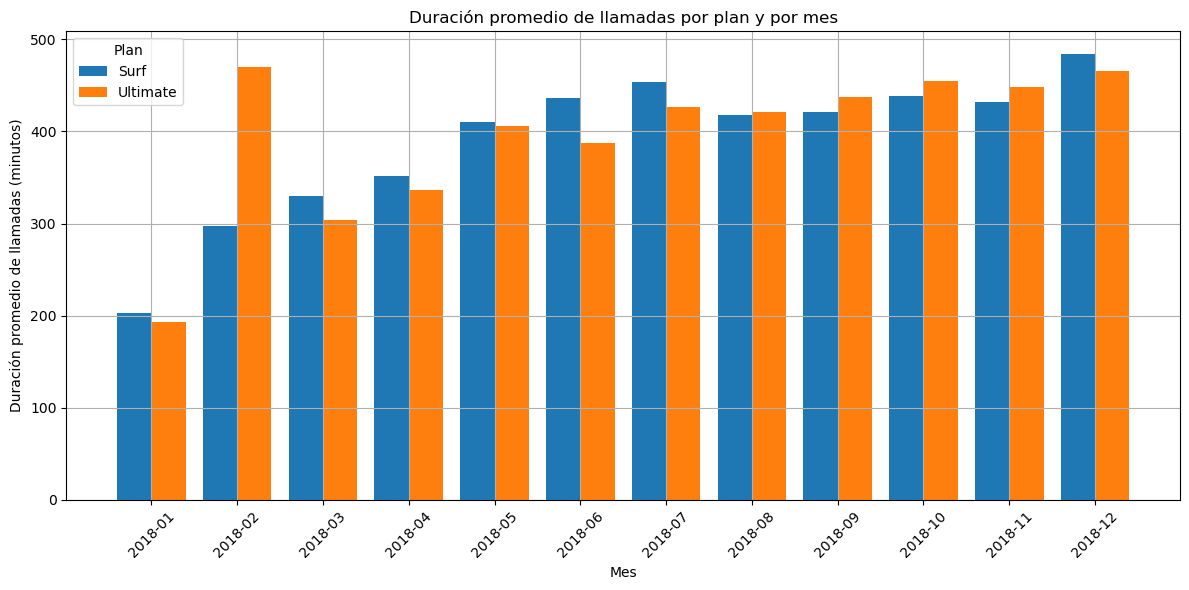

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupación de datos y cálculo de la duración promedio de llamadas por plan y por mes
average_call_duration = user_monthly_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Obtener los meses únicos para ordenarlos adecuadamente en el eje x
months = sorted(average_call_duration['month'].unique())

# Obtener la duración promedio de llamadas para cada plan en cada mes
surf_duration = average_call_duration[average_call_duration['plan'] == 'surf']['total_minutes']
ultimate_duration = average_call_duration[average_call_duration['plan'] == 'ultimate']['total_minutes']

# Configuración de la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar las barras para Surf
plt.bar(np.arange(len(months)) - 0.2, surf_duration, width=0.4, label='Surf', align='center')

# Graficar las barras para Ultimate
plt.bar(np.arange(len(months)) + 0.2, ultimate_duration, width=0.4, label='Ultimate', align='center')

# Configuración de etiquetas y leyenda
plt.title('Duración promedio de llamadas por plan y por mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.xticks(np.arange(len(months)), months, rotation=45)
plt.legend(title='Plan')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

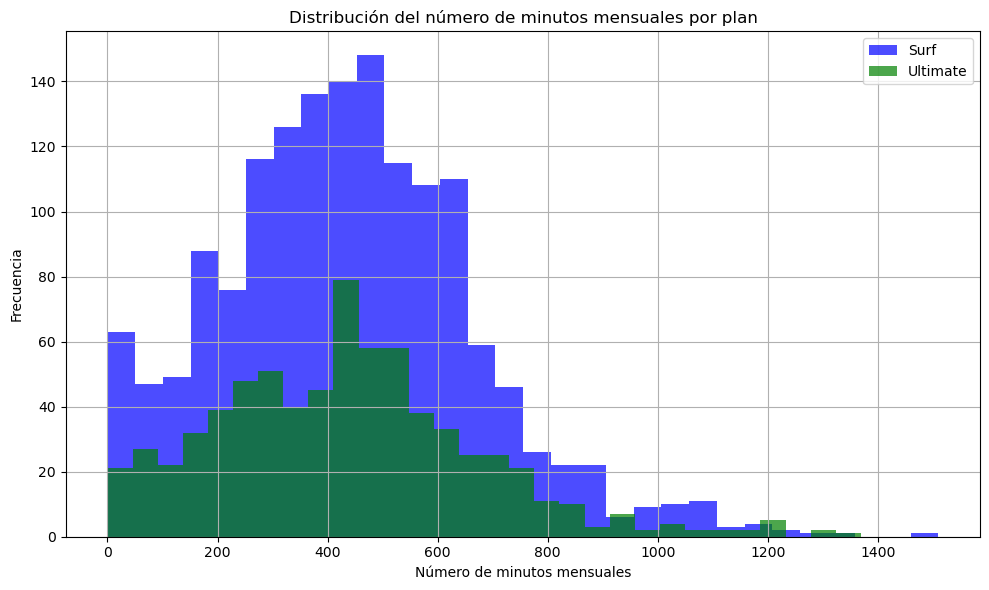

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar los datos por plan
surf_minutes = user_monthly_data[user_monthly_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['total_minutes']

# Configuración de la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar histograma para Surf
plt.hist(surf_minutes, bins=30, alpha=0.7, color='blue', label='Surf')

# Graficar histograma para Ultimate
plt.hist(ultimate_minutes, bins=30, alpha=0.7, color='green', label='Ultimate')

# Configuración de etiquetas y leyenda
plt.title('Distribución del número de minutos mensuales por plan')
plt.xlabel('Número de minutos mensuales')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.

In [39]:
# Calcula la media de la duración mensual de llamadas por plan
mean_call_duration = user_monthly_data.groupby('plan')['total_minutes'].mean()
print("Media de la duración mensual de llamadas por plan:\n", mean_call_duration)

# Calcula la varianza de la duración mensual de llamadas por plan
var_call_duration = user_monthly_data.groupby('plan')['total_minutes'].var()
print("\nVarianza de la duración mensual de llamadas por plan:\n", var_call_duration)

Media de la duración mensual de llamadas por plan:
 plan
surf        436.519741
ultimate    434.676017
Name: total_minutes, dtype: float64

Varianza de la duración mensual de llamadas por plan:
 plan
surf        52571.063243
ultimate    56573.632247
Name: total_minutes, dtype: float64


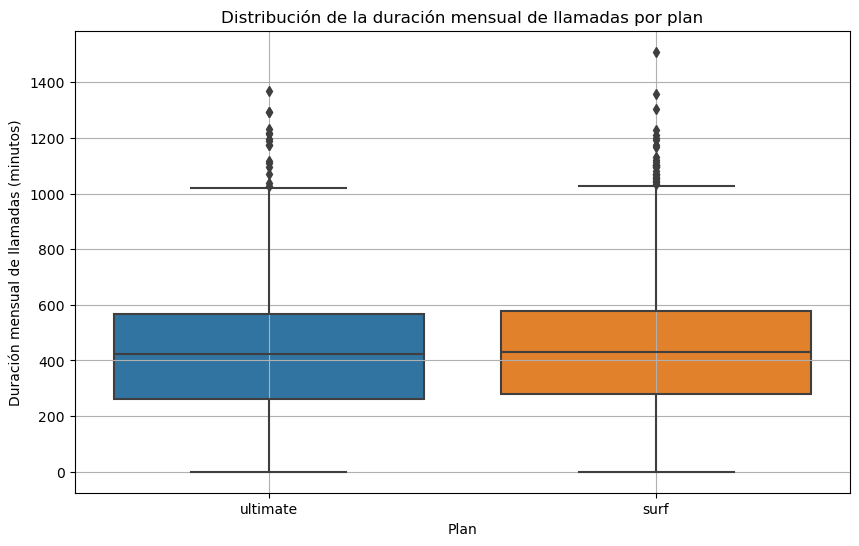

In [40]:
import seaborn as sns  # Importar seaborn

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly_data, x='plan', y='total_minutes')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.grid(True)
plt.show()

* __Variabilidad__: Los usuarios del plan Ultimate muestran menos variabilidad en la duración de las llamadas en comparación con los usuarios del plan Surf, que presentan una mayor dispersión y outliers significativos.


* __Consistencia__: El plan Ultimate atrae a usuarios con necesidades de llamadas más consistentes y predecibles, mientras que el plan Surf es preferido por usuarios con un rango más amplio de necesidades, incluyendo algunos con un uso muy alto de minutos.

* __Implicaciones para la gestión__:


  * __Ajuste de Planes__: Podría ser beneficioso ajustar características o precios de los planes basándose en estos patrones de uso.
  * __Estrategias de Marketing__: Los patrones observados pueden guiar campañas de marketing dirigidas específicamente a atraer diferentes tipos de usuarios según su consumo de llamadas.

### Mensajes

In [41]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

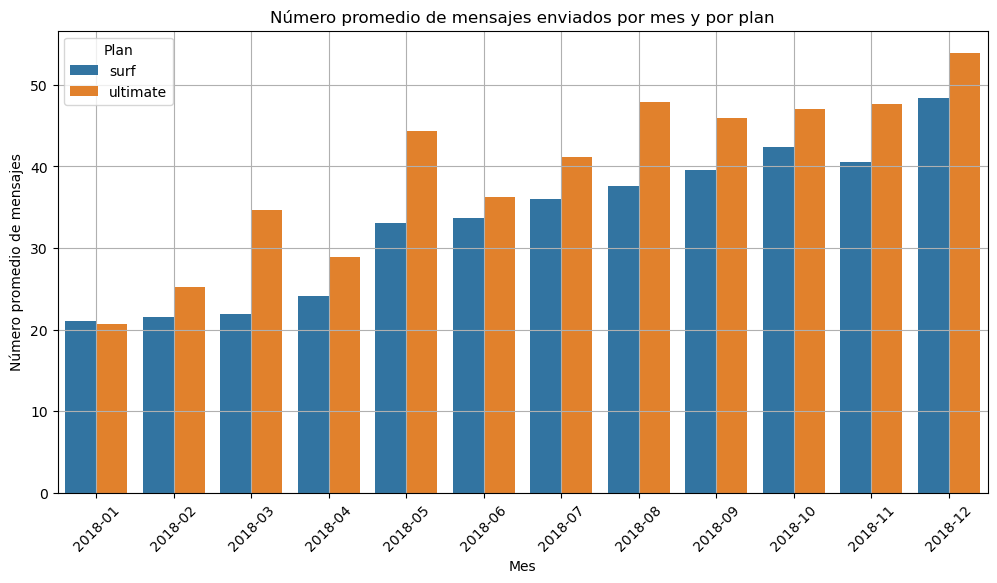

In [42]:
# Agrupar los datos por plan y mes, calcular el número total de mensajes enviados por cada usuario en cada mes
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='total_messages')

# Calcular el promedio de mensajes enviados por mes para los usuarios de cada plan
average_messages_per_month = messages_per_month.merge(users[['user_id', 'plan']], on='user_id')
average_messages_per_month = average_messages_per_month.groupby(['plan', 'month'])['total_messages'].mean().reset_index()

# Visualizar los resultados utilizando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=average_messages_per_month, x='month', y='total_messages', hue='plan')
plt.title('Número promedio de mensajes enviados por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True)
plt.show()

**1. Mayor Uso en el Plan Ultimate:**

* Los usuarios del plan "ultimate" envían más mensajes que los del plan "surf" a lo largo del año. Esto indica que el plan "ultimate" puede ser más atractivo para los usuarios que se comunican frecuentemente a través de mensajes.

**2. Tendencias Temporales:**

* Aunque ambos planes muestran un incremento en la cantidad de mensajes hacia el final del año, el aumento es más notable en el plan "ultimate". Esto sugiere que los usuarios de este plan pueden estar más activos en enviar saludos y comunicaciones durante eventos especiales y festividades.

**3. Fluctuaciones y Picos:**

* Las fluctuaciones en el número de mensajes son evidentes en ambos planes, pero especialmente en el plan "ultimate", donde los picos como los observados en marzo y agosto podrían reflejar promociones o cambios estacionales en el comportamiento del usuario.

**4. Implicaciones para la Gestión de Productos:**

* __Adaptación de Planes__: Considerando el uso más intensivo de mensajes en el plan "ultimate", puede ser ventajoso para la empresa optimizar este plan para incluir aún más beneficios relacionados con mensajería.

* __Marketing y Promociones__: Las promociones pueden ser diseñadas para aprovechar los picos de uso, ofreciendo bonificaciones o ventajas adicionales durante estos períodos para aumentar la satisfacción y la fidelidad de los usuarios.

### Internet

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

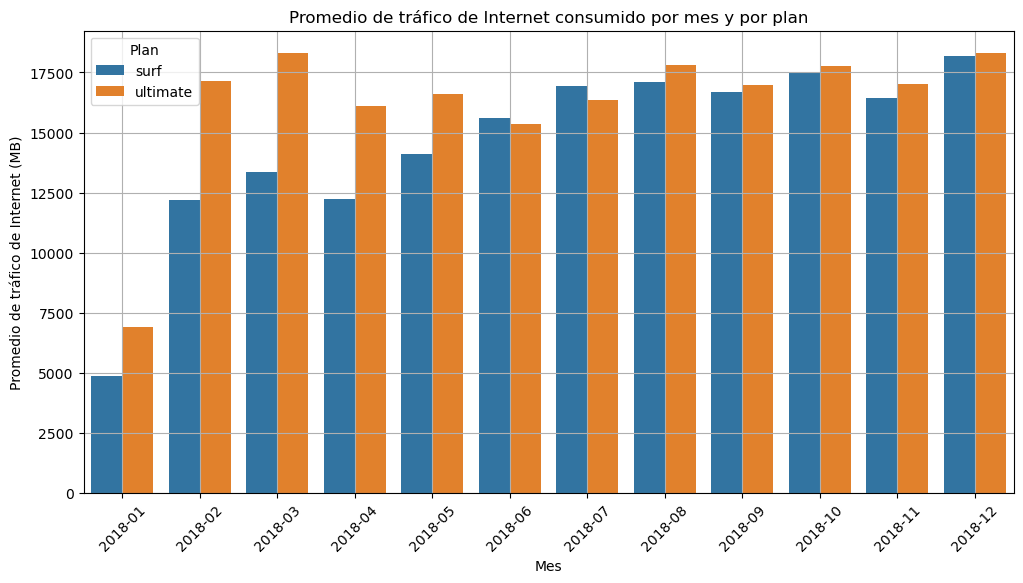

In [44]:
# Agrupar los datos por plan y mes, calcular el total de tráfico de Internet consumido por cada usuario en cada mes
internet_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Calcular el promedio de tráfico de Internet consumido por mes para los usuarios de cada plan
average_internet_per_month = internet_per_month.merge(users[['user_id', 'plan']], on='user_id')
average_internet_per_month = average_internet_per_month.groupby(['plan', 'month'])['mb_used'].mean().reset_index()

# Visualizar los resultados utilizando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=average_internet_per_month, x='month', y='mb_used', hue='plan')
plt.title('Promedio de tráfico de Internet consumido por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de tráfico de Internet (MB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True)
plt.show()

**1. Consumo General:**

Ambos planes muestran un crecimiento general en el consumo de datos a lo largo del año. Esto puede reflejar un aumento en el número de usuarios, así como una mayor dependencia de los servicios de datos a medida que más aplicaciones y servicios en línea se integran en la vida cotidiana.

**2. Comparación entre Planes:**

Los usuarios del plan "ultimate" (naranja) consumen consistentemente más datos que los del plan "surf" (azul) a lo largo de todo el año. Esto sugiere que el plan "ultimate" podría estar ofreciendo condiciones más atractivas.

**3. Patrones de Consumo:**

A partir de marzo, se observa un incremento notable en el uso de datos en ambos planes, que se mantiene relativamente alto durante el resto del año. Este patrón puede estar influenciado por factores estacionales.

## Ingreso

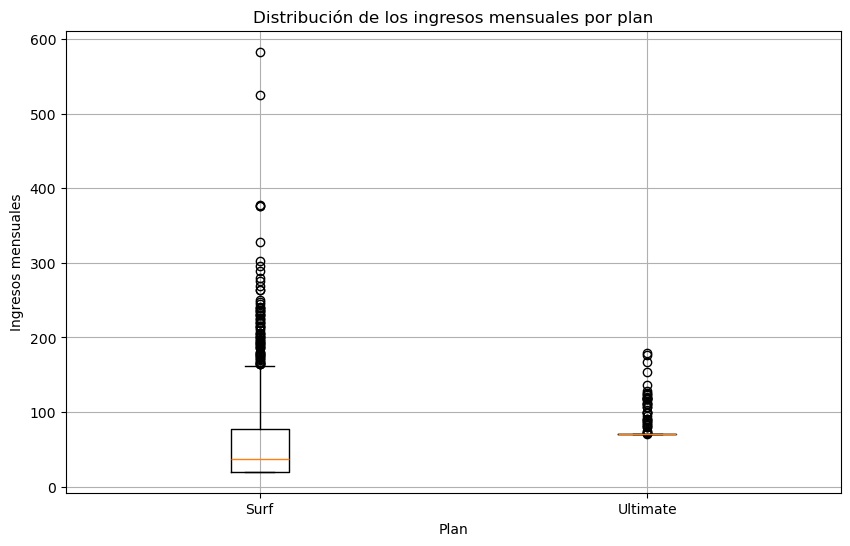

In [45]:
# Calcular los ingresos mensuales por usuario
monthly_revenue = user_monthly_data.groupby(['user_id', 'month'])['monthly_revenue'].sum().reset_index()

# Combinar monthly_revenue con users usando user_id
revenue_users = monthly_revenue.merge(users[['user_id', 'plan']], on='user_id')

# Visualizar la distribución de los ingresos utilizando un diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([revenue_users[revenue_users['plan'] == 'surf']['monthly_revenue'], 
             revenue_users[revenue_users['plan'] == 'ultimate']['monthly_revenue']],
            labels=['Surf', 'Ultimate'])
plt.title('Distribución de los ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales')
plt.grid(True)
plt.show()

**Observaciones Estadísticas**

**1. Distribución de Ingresos:**

* **Surf**: Este plan muestra una mediana de ingresos bastante baja con una caja estrecha, indicando una menor variabilidad y una concentración de ingresos alrededor de la mediana. Hay una cantidad significativa de outliers, algunos de los cuales son bastante altos, lo que sugiere que algunos usuarios generan ingresos mucho mayores que el promedio.

* **Ultimate**: La mediana de este plan es significativamente más alta que la del plan Surf, indicando que en general, los usuarios de este plan tienden a generar más ingresos mensuales. La caja es muy estrecha, lo que muestra una variabilidad muy baja en los ingresos entre los usuarios de este plan. Los outliers son menos frecuentes y menos extremos en comparación con el plan Surf.

**2. Rango de Ingresos:**

Los usuarios del plan Surf tienen un rango más amplio de ingresos mensuales, mientras que los usuarios del plan Ultimate tienden a tener ingresos más estables y predecibles.

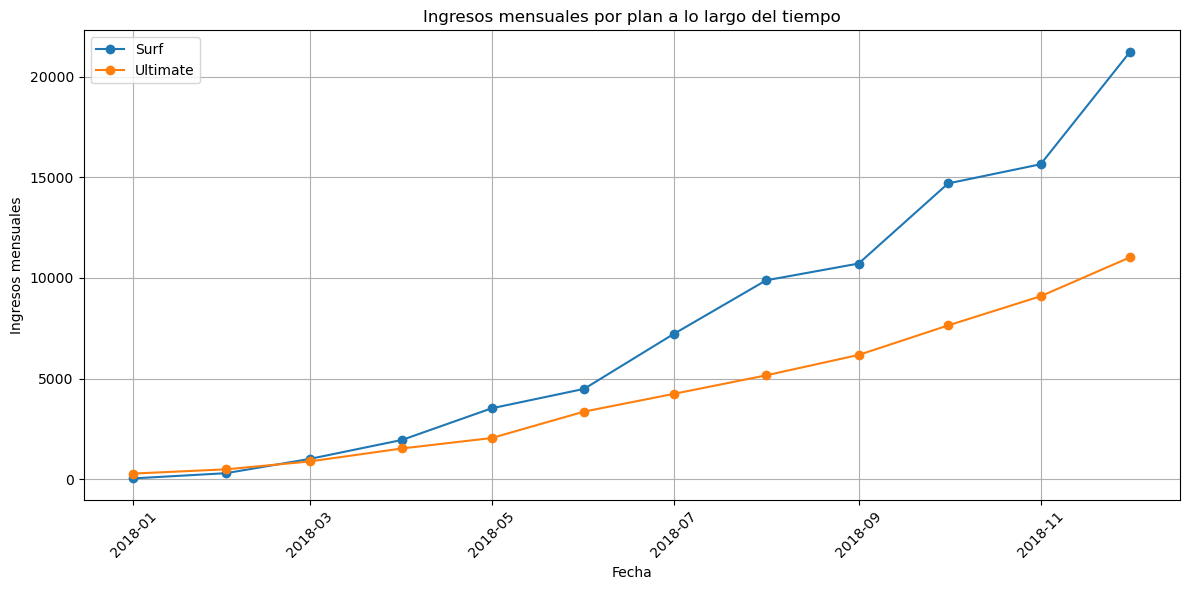

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya tienes definido el DataFrame 'user_monthly_data' con los ingresos mensuales por usuario

# 1. Convertir la columna 'month' a tipo datetime
user_monthly_data['month'] = user_monthly_data['month'].dt.to_timestamp()

# 2. Agrupar los datos por mes y plan para calcular los ingresos totales mensuales por plan
monthly_revenue = user_monthly_data.groupby(['plan', 'month'])['monthly_revenue'].sum().reset_index()

# Dividir los datos en DataFrames separados para 'surf' y 'ultimate'
surf_revenue = monthly_revenue[monthly_revenue['plan'] == 'surf']
ultimate_revenue = monthly_revenue[monthly_revenue['plan'] == 'ultimate']

# 3. Crear un gráfico de líneas
plt.figure(figsize=(12, 6))

# Línea para el plan Surf
plt.plot(surf_revenue['month'], surf_revenue['monthly_revenue'], marker='o', label='Surf')

# Línea para el plan Ultimate
plt.plot(ultimate_revenue['month'], ultimate_revenue['monthly_revenue'], marker='o', label='Ultimate')

# Configuraciones del gráfico
plt.title('Ingresos mensuales por plan a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos mensuales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Observaciones Estadísticas**

**1. Crecimiento de Ingresos:**

* __Surf__: El gráfico muestra un crecimiento sostenido y pronunciado de los ingresos para el plan Surf a lo largo del año. Este aumento podría estar impulsado por un crecimiento en el número de usuarios, un incremento en el uso de servicios adicionales, o ajustes en las políticas de precios que aumentan los ingresos.


* __Ultimate__: El plan Ultimate también muestra un crecimiento constante, aunque a un ritmo más moderado comparado con el plan Surf. Esto podría indicar que aunque el plan tiene usuarios posiblemente más estables, su potencial de crecimiento de ingresos es menor o más limitado.

**2. Tasa de Crecimiento:**
La tasa de crecimiento de los ingresos es claramente más alta para el plan Surf hacia el final del año, lo que podría sugerir una adopción más rápida de este plan o una mayor elasticidad en cuanto a los cambios en la tarificación y los servicios ofrecidos.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [50]:
import pandas as pd
from scipy.stats import ttest_ind

# Supongamos que tenemos un DataFrame llamado 'user_monthly_data' con los ingresos mensuales por usuario y su plan
# user_monthly_data debe contener al menos las columnas 'monthly_revenue' y 'plan'

# Filtrar los ingresos mensuales por plan
surf_revenue = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Valor alfa (nivel de significancia)
alpha = 0.05

# Imprimir los resultados
print("Prueba de hipótesis:")
print("H0: No hay diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")
print("H1: Existe una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")
print("\nResultado:")
print("Valor p:", p_value)
print("Valor alfa:", alpha)

# Comprobar si se rechaza la hipótesis nula
if p_value < alpha:
    print("\nSe rechaza la hipótesis nula. Hay una diferencia significativa en los ingresos promedio.")
else:
    print("\nNo se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar una diferencia significativa en los ingresos promedio.")

Prueba de hipótesis:
H0: No hay diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.
H1: Existe una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.

Resultado:
Valor p: 8.533935115379737e-24
Valor alfa: 0.05

Se rechaza la hipótesis nula. Hay una diferencia significativa en los ingresos promedio.


**Formulación de Hipótesis**

**Hipótesis Nula (H0)**: El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.

**Hipótesis Alternativa (H1)**: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

**Prueba Estadística**

La prueba t de Student para muestras independientes es apropiada aquí, particularmente con **equal_var=False** para no asumir varianzas iguales (esto es un enfoque conservador y se adapta bien a muestras con posible variabilidad en las varianzas).

**Valor Alfa**

El nivel de significancia alfa (α) comúnmente usado es 0.05, lo que indica un 5% de riesgo de rechazar la hipótesis nula cuando en realidad es verdadera.

In [65]:
# Fusionar user_monthly_data con users utilizando user_id para obtener la columna city
user_monthly_data_merged = user_monthly_data.merge(users[['user_id', 'city']], on='user_id')

# Filtrar los ingresos de los usuarios del área NY-NJ y de otras regiones
ny_nj_income = user_monthly_data_merged[user_monthly_data_merged['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_regions_income = user_monthly_data_merged[user_monthly_data_merged['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

# Realizar la prueba t de Student para muestras independientes
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(ny_nj_income, other_regions_income, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: -2.3304782873041243
Valor p: 0.020130823592426173


Un **estadístico t negativo** indica que el promedio de ingresos de los usuarios en el área de **NY-NJ es menor que el promedio de ingresos de los usuarios de otras regiones**.

Dado que el **valor p < 0.05**, rechazamos la hipótesis nula de que el ingreso promedio de los usuarios en el área de NY-NJ es igual al de los usuarios de otras regiones. Aceptamos la hipótesis alternativa de que hay una diferencia significativa en los ingresos promedios entre estos dos grupos.

Este resultado sugiere que los **ingresos promedios en NY-NJ son significativamente diferentes** (en este caso, menores) **comparados con los de otras regiones**.

## Conclusión general

**1. Limpieza de datos y preparación:** Se realizó una limpieza exhaustiva de los datos para manejar valores nulos, tipos de datos incorrectos y datos inconsistentes. Además, se modificaron tipos de datos y se fusionaron múltiples conjuntos de datos para un análisis más completo.

**2. Análisis de comportamiento de usuarios:** Se exploró el comportamiento de los usuarios en función de su plan, consumo de llamadas, mensajes y uso de Internet. Esto permitió identificar tendencias de uso y preferencias entre los usuarios de diferentes planes.

**3. Análisis de ingresos:** Se calculó el ingreso mensual por usuario y se compararon los ingresos entre diferentes planes y regiones. Esto proporcionó información valiosa sobre la rentabilidad de cada plan y la variación en los ingresos según la ubicación de los usuarios.

**4. Pruebas estadísticas:** Se llevaron a cabo pruebas estadísticas, como la prueba t de Student, para evaluar si existían diferencias significativas en los ingresos entre diferentes grupos de usuarios, como aquellos en diferentes planes o regiones. Esto ayudó a respaldar conclusiones con base en evidencia estadística.

En resumen, el análisis proporcionó información valiosa sobre el comportamiento y los ingresos de los usuarios, lo que puede ser útil para tomar decisiones comerciales informadas y mejorar la satisfacción del cliente.